In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# this is for mapping the kneighbors
from matplotlib.colors import ListedColormap
%matplotlib inline

## Fake dataset with anonymised values

Classical interview project.

In [2]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
# Use the features to predict a target class
# the KNN uses distances to predict, so the scale of the target class matters a lot!
# every variable in a large scale is going to impact, standardize first


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
# drop the results before you scale!
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features # instead of 50000 to 1520000 we go from 0 to 1

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1]) #df.columns grab the original columns name (everything but not the last one)

In [10]:
df_feat.head() # the data is now ready for K nearest, who depends on the distance!

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_feat

y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

# Evaluate the grabber

In [17]:
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


In [19]:
# Own function to gather type 1 and type 2 errors
minimum = 10000000

for i in range(1,10):
    
    optimal_neigbhbour = 0
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    
    print('Confusion matrix for '+ str(i))
    print(confusion_matrix(prediction, y_test))
    
    # need to do it, confusion_matrix overshadows the array
    cm = confusion_matrix(prediction, y_test)
    poss_min = cm[0][1] + cm[1][0]
    print("possible minimum " + str(poss_min))
    
    if (poss_min < minimum):
        minimum = poss_min
        optimal_neigbhbour = i # why does the optimal number of neighbors is 0?? Bug between run 4 and 5
    
    print('\nClassification report for '+ str(i))
    print(classification_report(prediction, y_test))
    
    print("minimal_conf :" + str(minimum) + " optimal number of neighbors "+ str(optimal_neigbhbour))


Confusion matrix for 1
[[151  15]
 [  8 126]]
possible minimum 23

Classification report for 1
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       166
           1       0.89      0.94      0.92       134

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

minimal_conf :23 optimal number of neighbors 1
Confusion matrix for 2
[[154  22]
 [  5 119]]
possible minimum 27

Classification report for 2
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       176
           1       0.84      0.96      0.90       124

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

minimal_conf :23 optimal number of neighbors 0
Confusion matrix for 3
[[152   8]
 [  7 133]]
possible minimum

In [20]:
# need to be in an environment that has cufflinks installed
# in my case: conda activate cuffo
import plotly
import cufflinks as cf
cf.go_offline()
from plotly import __version__
__version__

'4.8.2'

In [21]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [22]:
#false positive
typeI = []
#false negative
typeII = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    # need to do it, confusion_matrix overshadows the array
    cm = confusion_matrix(prediction, y_test)
    typeI.append(cm[0][1])
    typeII.append(cm[1][0])

In [23]:
# convert the two arrays into a dataframe to iplot it
type1_type_2_df = pd.DataFrame(data=[typeI, typeII])

In [24]:
# really weird plot, no idea what it represents!
type1_type_2_df.iplot()

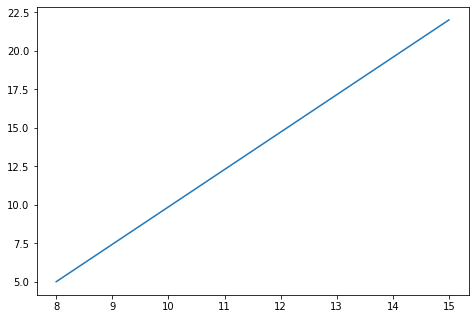

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(type1_type_2_df[0],type1_type_2_df[1])

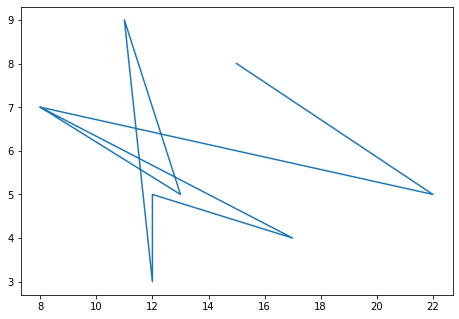

In [26]:
# versus transposed, any weirder!
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(type1_type_2_df.T[0],type1_type_2_df.T[1])

In [27]:
type1_type_2_df.rename(index={0: 'Type 1', 1: 'Type 2'}, inplace=True)

In [27]:
type1_type_2_df

,0,1,2,3,4,5,6,7,8
0,15,22,8,17,12,12,11,13,8
1,8,5,7,4,5,3,9,5,7


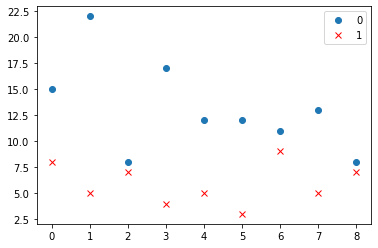

In [30]:
# another plot of error type one vs type 2
transposed_df = type1_type_2_df.T
transposed_df.plot(style=['o','rx'])

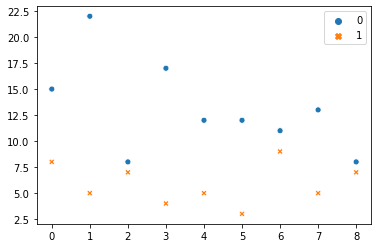

In [31]:
s=40
sns.scatterplot(data=transposed_df, size=s)

In [32]:
# real way to do it: append to the error rate the mean where pred i gave a different result
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'Neighbors')

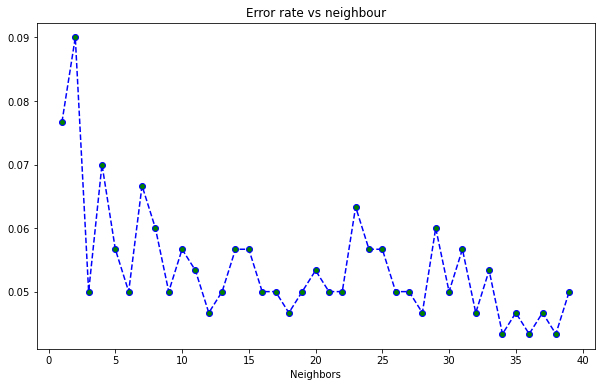

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='b', linestyle='dashed', marker='o', markerfacecolor='g')
plt.title('Error rate vs neighbour')
plt.xlabel('Neighbors')

In [35]:
error_rate


[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

In [36]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [37]:
# neighbor classifier already created

In [38]:
n_neighbor=15
knn15 = KNeighborsClassifier(n_neighbors=n_neighbor)
h = 0.02 # step size in the mesh

# I don't understand this step. Why do we take only 2 columns?
X_2 = X.iloc[:, :2]
# y is probably y

knn15.fit(X_2,y);

# here there will be a slice error: https://github.com/marcotcr/lime/issues/293

# I honestly do not understand what's going on here
x_min, x_max = X_2.iloc[:, 0].min() - 1, X_2.iloc[:, 0].max() + 1
y_min, y_max = X_2.iloc[:, 1].min() - 1, X_2.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn15.predict(np.c_[xx.ravel(), yy.ravel()])

In [39]:
#why that step??
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, "I don't know what I am about (k=15)")

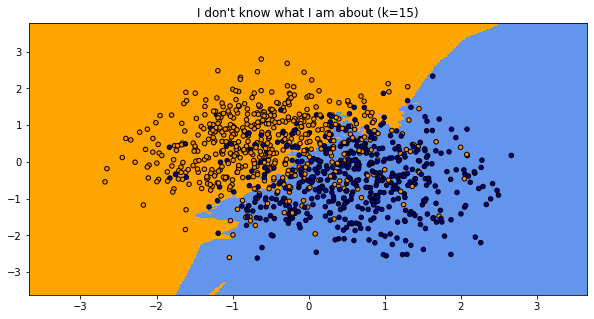

In [40]:
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("I don't know what I am about (k=%i)"%(n_neighbor))

In [41]:
X

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [43]:
# tried to redo it
n_neighbor=15
knn15 = KNeighborsClassifier(n_neighbors=n_neighbor)
h = 0.02 # step size in the mesh

knn15.fit(X,y);

# here there will be a slice error: https://github.com/marcotcr/lime/issues/293

# I honestly do not understand what's going on here
x_min, x_max = X.iloc[:,:].min(), X.iloc[:,:].max()
y_min, y_max = X.iloc[:,:].min(), X.iloc[:,:].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn15.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().